## Nu.nl Convert Data

Convert nu.nl data to text data format

In [1]:
import datetime
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import clear_output

In [2]:
DATADIRIN1 = "../data/nunl/downloads/"
DATADIRIN2 = "../data/nunl/downloads2/"
DATADIROUT = "../data/nunl/text/"
FILEPATTERN = r"."
DATEPATTERNIN = "%m/%d/%Y, %I:%M:%S %p"
DATEPATTERNOUT = "%Y%m%d-%H"
FILESUFFIX = ".out.gz"
DATE = "date"
TEXT = "text"
NAME = "name"
ID = "id"
IDSTR = "id_str"
PARENT = "parent"
REPLYID = "in_reply_to_status_id_str"
USER = "user"
VERIFIED = "verified"

In [3]:
def squeal(text=None):
    clear_output(wait=True)
    if not text is None: print(text)

## Get all comments from downloaded files

In [5]:
idStr = ""
replyId = ""
verified = ""
dataPerHour = {}
inFileNames1 = sorted(os.listdir(DATADIRIN1))

for inFileName in inFileNames1:
    if re.search(FILEPATTERN,inFileName):
        squeal(inFileName)
        try:
            dfIn = pd.read_csv(DATADIRIN1+inFileName)
        except:
            continue
        for i in range(0,len(dfIn)):
            try:
                hourStringComplete = dfIn.iloc[i][DATE]
                date = datetime.datetime.strptime(hourStringComplete,DATEPATTERNIN)
                hourStringHour = date.strftime(DATEPATTERNOUT)
            except: break
            if not hourStringHour in dataPerHour: dataPerHour[hourStringHour] = []
            dataPerHour[hourStringHour].append(dfIn.iloc[i])

weekend-6065116-68.csv


In [6]:
inFileNames2 = sorted(os.listdir(DATADIRIN2))

for inFileName in inFileNames2:
    if re.search(FILEPATTERN,inFileName):
        squeal(inFileName)
        try:
            dfIn = pd.read_csv(DATADIRIN2+inFileName)
        except:
            continue
        for i in range(0,len(dfIn)):
            try:
                hourStringComplete = dfIn.iloc[i][DATE]
                date = datetime.datetime.strptime(hourStringComplete,DATEPATTERNIN)
                hourStringHour = date.strftime(DATEPATTERNOUT)
            except: break
            if not hourStringHour in dataPerHour: dataPerHour[hourStringHour] = []
            dataPerHour[hourStringHour].append(dfIn.iloc[i])

nunl-wielrennen-6067382-109.csv


## Store all comments in hour files

In [8]:
for hourString in sorted(dataPerHour.keys()):
    squeal(hourString)
    outFileName = hourString+FILESUFFIX
    if len(dataPerHour[hourString]) > 0:
        dfOut = pd.DataFrame(dataPerHour[hourString]).rename(columns={ID:IDSTR,NAME:USER,PARENT:REPLYID})
        del(dfOut[DATE])
        dfOut[VERIFIED] = ["" for i in range(0,len(dfOut))]
        dfOut.to_csv(DATADIROUT+outFileName,index=False,compression="gzip")

20200806-22


## Visualize number of comments per day

In [11]:
def movingAverage(numberList,size):
    newList = []
    for i in range(0,len(numberList)):
        numberUsed = 1
        newList.append(numberList[i])
        for j in range(1,size):
            if i-j >= 0:
                newList[i] += numberList[i-j]
                numberUsed += 1
        newList[i] /= numberUsed
    return(newList)

In [9]:
countsPerDate = {}
for hourString in sorted(dataPerHour.keys()):
    dateString = hourString[0:8]
    if not dateString in countsPerDate: countsPerDate[dateString] = 0
    countsPerDate[dateString] += len(dataPerHour[hourString])

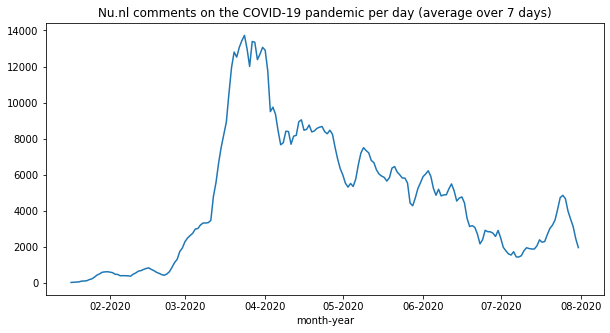

In [13]:
DATEFORMATDAY = "%Y%m%d"
PLOTFILENAME = "frequency-nunl.png"
WEEKLENGTH = 7

x = [datetime.datetime.strptime(d,DATEFORMATDAY) for d in countsPerDate if d < "20200801"]
y = [countsPerDate[d] for d in countsPerDate if d < "20200801"]

plt.subplots(figsize=(10,5))
ax = plt.subplot(111)
plt.plot_date(x,movingAverage(y,WEEKLENGTH),fmt="-")
plt.xlabel("month-year")
plt.title(f"Nu.nl comments on the COVID-19 pandemic per day (average over {WEEKLENGTH} days)")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
plt.savefig(PLOTFILENAME)
plt.show()